In [2]:
!pip install prophet

  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/917.9 kB ? eta -:--:--
   --------------------------------------- 917.9/917.9 kB 14.0 MB/s eta 0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np


In [22]:
data = pd.read_csv('merged_df.csv')
df = data.rename(columns={"Data": "ds", "value": "y"})
df["ds"] = pd.to_datetime(df["ds"])

train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

In [ ]:
df.ds.isnull().sum()

479

C:\Users\micha\AppData\Local\Temp\ipykernel_37156\542872357.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  decompose.plot().show()


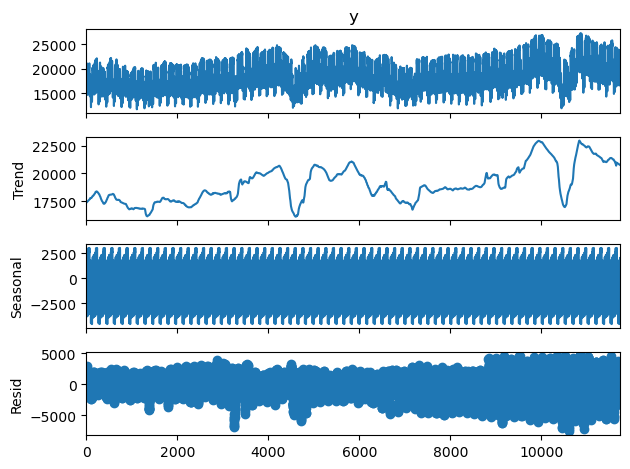

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(train.y, model='additive', extrapolate_trend='freq', period=168)

decompose.plot().show()

In [23]:

from prophet.make_holidays import make_holidays_df

holidays = make_holidays_df(year_list=[2023, 2024,2025], country="PL")

model = Prophet(holidays=holidays)
model.add_seasonality(name='daily', period=24, fourier_order=15)  # Daily seasonality (24 hours)
model.add_seasonality(name='weekly', period=24*7, fourier_order=20)  # Weekly seasonality (24*7 hours)

# Trenowanie modelu na danych
model.fit(train)

ValueError: Found NaN in column ds.

In [41]:
# Tworzymy przyszłe daty dla okresów godzinowych
future = model.make_future_dataframe(periods=len(test), freq='H')

# Generujemy prognozę
forecast = model.predict(future)

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [42]:
# Pobieramy tylko te prognozy, które odpowiadają testowym danym
forecast_test = forecast.iloc[-len(test):]  # Ostatnie n prognoz

# Obliczamy MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test["y"].values, forecast_test["yhat"].values)
print(f"MAPE: {mape:.2f}%")

MAPE: 18.52%


In [ ]:
test

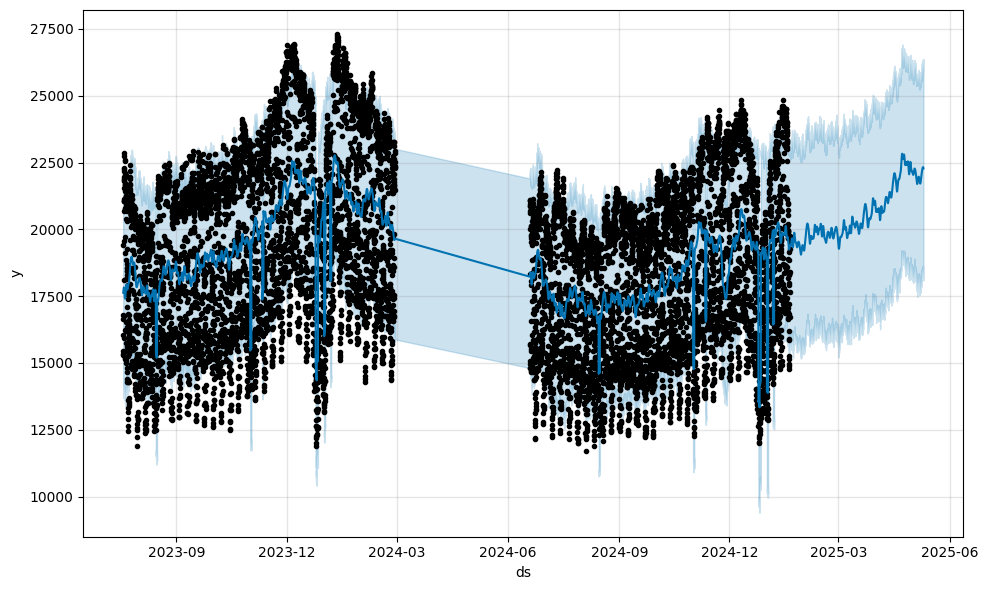

In [43]:
# Rysujemy wykres prognozy
fig = model.plot(forecast)
plt.show()